# MODELO CLASIFICACION SUPPORT VECTOR MACHINE

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. La variable edad tambien es transformada a Int(64)

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [5]:
df = df.select_dtypes('number')

In [6]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [15]:
clfsvm = SVC(probability=True)

In [8]:
clfsvm.fit(X,y)

SVC()

In [9]:
clfsvm.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [ ]:
clfsvm.fit(X_train,y_train)

In [ ]:
clfsvm.predict(X_test)

In [ ]:
clfsvm.predict_proba(X_test)[:, 1]

In [ ]:
print('== Primera Aproximacion CLR_model ==')
print ('accuracy_score =', accuracy_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('precision  =', precision_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfsvm.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clfsvm.predict(X_test)))

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfsvm.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfsvm.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## MODELO 

In [ ]:
df_normalizado = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalizado.csv')

In [ ]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

In [ ]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [ ]:
clfsvm = svc()

In [ ]:
clfsvm.fit(X_train, y_train)

In [ ]:
clfsvm.predict(X_test)

In [ ]:
clfsvm.predict_proba(X_test)[:, 1]

__Primeros resultados__. Los resultados obtenidos de train y test utilizando como medida la metrica recall informan que el modelo no esta generalizando bien. Existe un calara situacion de overfiting que debo solucionar. Lo confirmarmos mediante Cross Validation. Para buscar soluciones y como siguiente paso utilizaremos Grid Search para buscar los mejores parametros a utilizar con este modelo y poder obtener una metrica correcta.


In [ ]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfsvm.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfsvm.predict(X_test)))

## Tecnicas Validacion Cruzada.  Metrics: Cross validation
Utilizamos Cross Validation para iterar con 'K_folds_veces' a lo largo del set de entrenamiento
- K_Fold utilizado 5 veces.

- Apartaremos 1/5 de muestras.
- Entrenamos al modelo con el restante 4/5 de muestras.
- Mediremos con distintas metricas el resultado obtenido sobre las muestras apartadas.
- Esto quiere decir que hacemos 5 entrenamientos independientes.
- Los resultados serán el promedio de las 5 accuracies anteriores.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfsvm,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfsvm,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfsvm,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

In [ ]:
matriz_confusion_clfsvm = confusion_matrix(y_test,clfsvm.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clfsvm.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [ ]:
print('========= CLFTREE ==================')
print ('accuracy_score = ', accuracy_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfsvm.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfsvm.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

## Pintamos Curva Roc

In [ ]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clfsvm.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_ = roc_curve(y_test,clfsvm.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

## GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# DecisionTreeClassifier() solo para ver paramentros

In [57]:
# criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,
tree_grid_params = {       
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [100,115,130]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [58]:
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [100, 115, 130],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [59]:
treegs.best_score_

0.7593873262747523

In [60]:
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=100)

In [61]:
treegs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

## Hacemos el modelo con los mejores parametros

In [82]:
clftree = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=10,min_samples_leaf=10,
                                 min_samples_split = 4)

In [83]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=4)

In [134]:
predictionstree = clftree.predict(X_test)

In [135]:
probabilitiestree = clftree.predict_proba(X_test)

In [136]:
clftree.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [137]:
clftree.predict_proba(X_test)[:, 1]

array([0.71570196, 0.61035443, 0.6992045 , ..., 0.61035443, 0.7153048 ,
       0.67987266])

[[51826 26771]
 [ 1296 10382]]


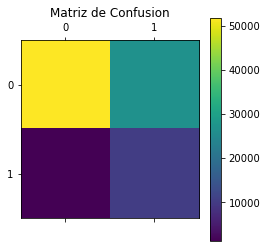

In [139]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [140]:
print('========= CLFTREE ===================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

========= CLFTREE ===================
accuracy_score =  0.6890944336748823
precision = 0.27943907625225417
recall = 0.8890220928241137
f1_score = 0.42522168294730806
roc_auc_score = 0.8261244986284697
